In [18]:

from html.parser import HTMLParser
from urllib.request import urlopen
import pandas as pd
import urllib
import matplotlib.pyplot as plt
%pylab inline


def get_data(url_meteors, x):
    
    ArrayHTML = []
    ahtml2=[]
    ahtml3=[]

    class MyHTMLParser(HTMLParser):
	    global ArrayHTML
	    global ahtml2
	    global ahtml3
	    def handle_data(self, data):
		    ahtml3.append(data)
	    def handle_starttag(self, tag, attrs):
		    if tag == "a":
			    for name, value in attrs:
				    ArrayHTML.append(value)
				    ahtml2.append(name)
    murl = url_meteors
    html_new = urlopen(url_meteors).read().decode("utf-8")

    parser = MyHTMLParser()
    parser.feed(html_new)   #modified
    ArrayHTML=ArrayHTML[1:]


    ahtml4=[]
    ahtml6=[]
            
    for link in ahtml3:
        if '\n' not in link and 'Index' not in link and 'Parent' not in link:
            ahtml6.append(link)
            

    nurl=murl+ahtml6[-1][1:]

    html_new = urlopen(nurl).read().decode("utf-8")
    
    parser = MyHTMLParser()
    parser.feed(html_new)    #modified
    ArrayHTML=ArrayHTML[1:]


    ahtml4=[]
    ahtml6=[]
         
    for link in ahtml3:
        if '\n' not in link and 'Index' not in link and 'Parent' not in link:
            ahtml6.append(link)
            
    xnurl=nurl+ahtml6[-1][1:]

    html_new = urlopen(xnurl).read().decode("utf-8")

    parser = MyHTMLParser()
    parser.feed(html_new)
    ArrayHTML=ArrayHTML[1:]


    ahtml4=[]
    ahtml6=[]
         
    for link in ahtml3:
        if '\n' not in link and 'Index' not in link and 'Parent' not in link:
            ahtml6.append(link)
            
            
    anurl=xnurl+ahtml6[-1][1:]
    html_new = urlopen(anurl).read().decode("utf-8")

    parser = MyHTMLParser()
    parser.feed(html_new)
    ArrayHTML=ArrayHTML[1:]

    ahtml4=[]
    ahtml6=[]

    for link in ahtml3:
        if link[-3:]=="csv":
            ahtml4.append(link)
            
    ahtml41=ahtml4
    ahtml7=[]   
    ahtml3=[]     
            
            
    if len(ahtml4)<x:
        aanurl=anurl[:-3]
        html_new = urlopen(aanurl).read().decode("utf-8")
        parser = MyHTMLParser()
        parser.feed(html_new)
        ArrayHTML
        ArrayHTML=ArrayHTML[1:]
        for link in ahtml3:
            if '\n' not in link and 'Index' not in link and 'Parent' not in link:
                ahtml6.append(link)
        aaanurl=aanurl+ahtml6[-2][1:]
        html_new = urlopen(aaanurl).read().decode("utf-8")
        parser = MyHTMLParser()
        parser.feed(html_new)
        ArrayHTML=ArrayHTML[1:]
        for link in ahtml3:
            if link[-3:]=="csv":
                ahtml7.append(link)
        ahtml4=ahtml4+ahtml7[-(x-len(ahtml41)):]
        listret=[ahtml4, ahtml7, anurl, aaanurl]
        return listret
    else:
        aaanurl=[]
        return [ahtml4, ahtml7, anurl, aaanurl]
        

def get_values(url_meteors, x):
    get_data(url_meteors, x)
    list_returned=get_data(url_meteors, x)

    
    [ahtml4, ahtml7, anurl, aaanurl]=list_returned
    ahtml4=ahtml4[:x]
    
    data = pd.DataFrame([])
    for filename in ahtml4:   
        if filename in ahtml7:
            data = pd.DataFrame.append(data, pd.read_csv(aaanurl + filename[1:], index_col='# file name', sep = ";"))
        else:
            data = pd.DataFrame.append(data, pd.read_csv(anurl + filename[1:], index_col='# file name', sep = ";"))  

    return data

def process_histogram(url_meteors, x, obsname):
    #get_values(url_meteors, x)
    data=get_values(url_meteors, x)
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    pd.DataFrame.hist(data, column = 2, bins = 100,)

    plt.title("Recent observations histogram"+" ("+obsname+")")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Count")
    plt.show()

def debug(url_meteors, x):
    return get_values(url_meteors, x)


def process_table(url_meteors, x, obsname):
    get_values(url_meteors, x)
    thelist=get_values(url_meteors, x)
    [freq_data, ahtml4]=thelist
#    print 'Included observation times for "'+obsname+'":' 
    for i in range(len(thelist[1])):      
        aaa=[]
        aaa=thelist[1][i]
#        print aaa[7:9]+'/'+ aaa[5:7]+'/'+ aaa[1:5], aaa[9:11]+':'+ aaa[11:13]
#    print '......'




Populating the interactive namespace from numpy and matplotlib


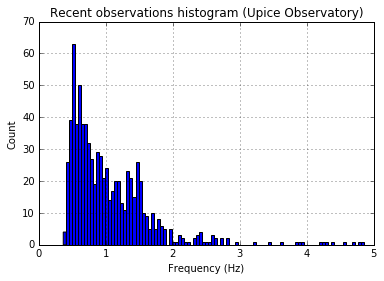

,noise,peak f,mag.,duration
# file name,,,,
20141022010007613_OBSUPICE-R1_met.fits,0.272463,10592.3,1.541840,0.170667
20141022010029800_OBSUPICE-R1_met.fits,0.235022,10598.1,0.598934,0.682667
20141022010107859_OBSUPICE-R1_met.fits,0.604014,10870.6,1.218730,0.341333
20141022010304936_OBSUPICE-R1_met.fits,0.237380,10602.5,0.761557,0.170667
20141022010406888_OBSUPICE-R1_met.fits,0.250349,10596.7,0.514490,0.170667
20141022010425832_OBSUPICE-R1_met.fits,0.222973,10563.0,0.866806,0.341333
20141022010517715_OBSUPICE-R1_met.fits,0.285034,10563.0,0.614796,0.512000
20141022010651411_OBSUPICE-R1_met.fits,0.221647,10596.7,0.506235,0.170667
20141022010657896_OBSUPICE-R1_met.fits,0.658162,10690.4,1.379870,0.170667


In [19]:
process_histogram("http://space.astro.cz/bolidozor/OBSUPICE/OBSUPICE-R1/data/",12, "Upice Observatory")
debug("http://space.astro.cz/bolidozor/OBSUPICE/OBSUPICE-R1/data/",12)
#process_histogram("http://space.astro.cz/bolidozor/uFlu/uFlu-R0/data/", 6, "FLuOBS")
#DHProcessor.process_table("http://space.astro.cz/bolidozor/OBSUPICE/OBSUPICE-R1/data/", 6, "Upice Observatory")
#DHProcessor.process_table("http://space.astro.cz/bolidozor/uFlu/uFlu-R0/data/", 6, "FLuOBS")